# Data Exploration

#### Data obtained from: [UCI Heart Failure](https://archive.ics.uci.edu/ml/datasets/Heart+failure+clinical+records)

## Import packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

## Load Data

In [2]:
HF= pd.read_csv('/Users/silviacatalina/Google Drive/BethelTech/GitHub/FinalProject/Data/heart_failure_clinical_records_dataset.csv')
HF.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [3]:
HF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


## Column description for thirteen (13) clinical features: 

### 1. IVs
#### Categorical
- __anaemia__: decrease of red blood cells or hemoglobin (boolean) 
- __high_blood_pressure__: if the patient has hypertension (boolean) 
- __diabetes__: if the patient has diabetes (boolean) 
- __sex__: woman or man (binary, 1 = man, 0 = woman) 
- __smoking__: if the patient smokes or not (boolean)


#### Continuous
- __age__: age of the patient (years) 
- __creatinine_phosphokinase__ (CPK): level of the CPK enzyme in the blood (mcg/L) 
- __ejection_fraction__: percentage of blood leaving the heart at each contraction (percentage) 
- __platelets__: platelets in the blood (kiloplatelets/mL) 
- __serum_creatinine__: level of serum creatinine in the blood (mg/dL) 
- __serum_sodium__: level of serum sodium in the blood (mEq/L) 
- __time__: follow-up period (days)  

### 2. DV: 
- __DEATH_EVENT__: if the patient deceased during the follow-up period (boolean) 

## Heat Map

<AxesSubplot:>

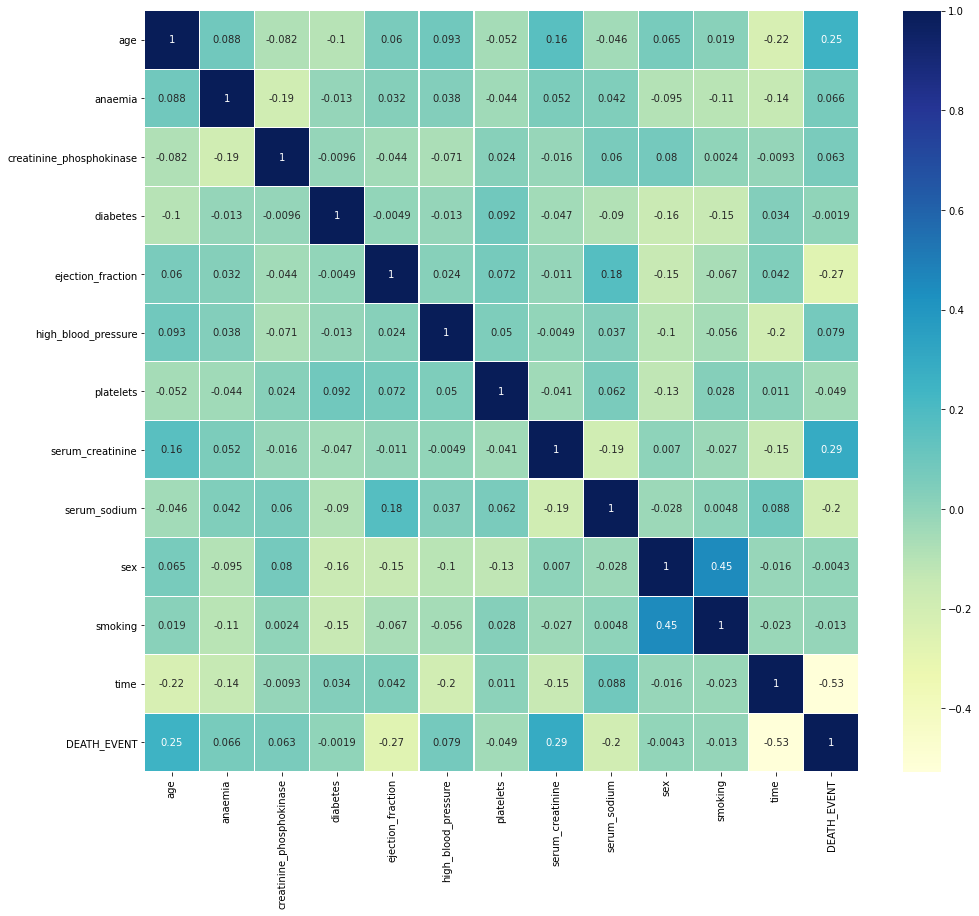

In [4]:
plt.figure(figsize=(16,14))
sns.heatmap(HF.corr(), cmap ="YlGnBu",linewidths = .1, annot = True)

__*None of the collumns are correlated*__

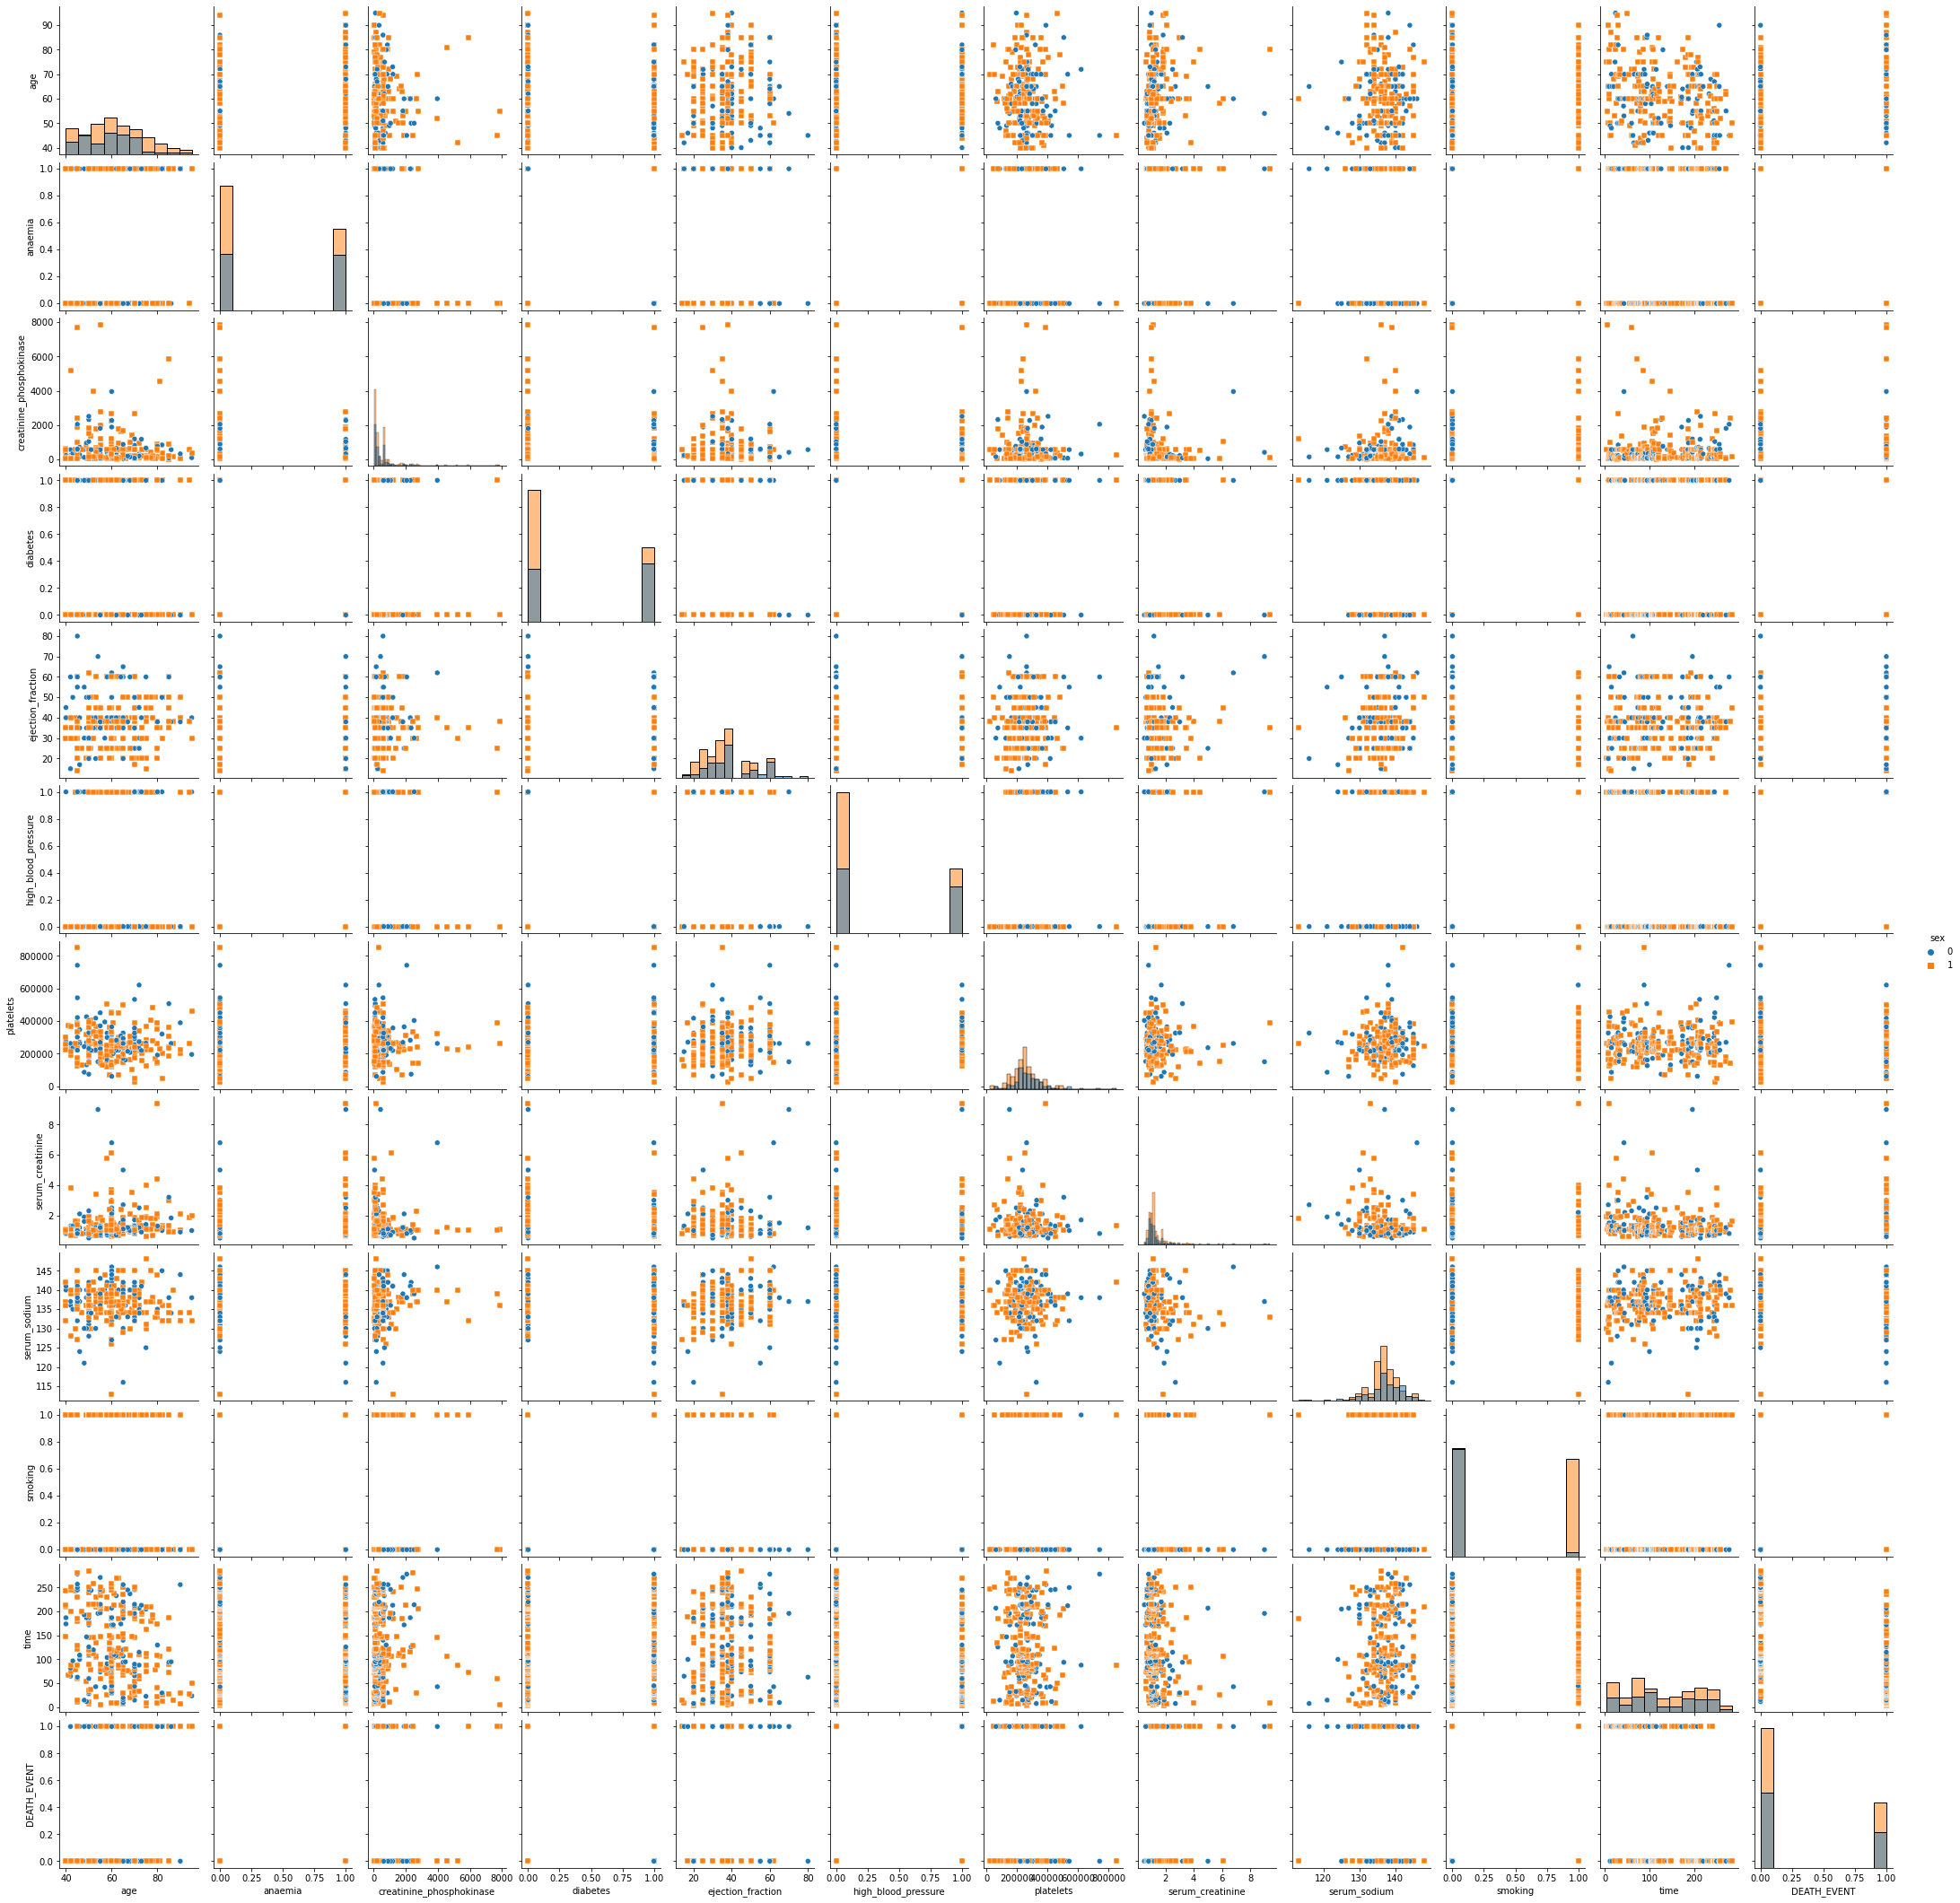

In [5]:
sns.pairplot(HF, hue = 'sex', diag_kind="hist", markers=["o", "s"])

## Bar Charts

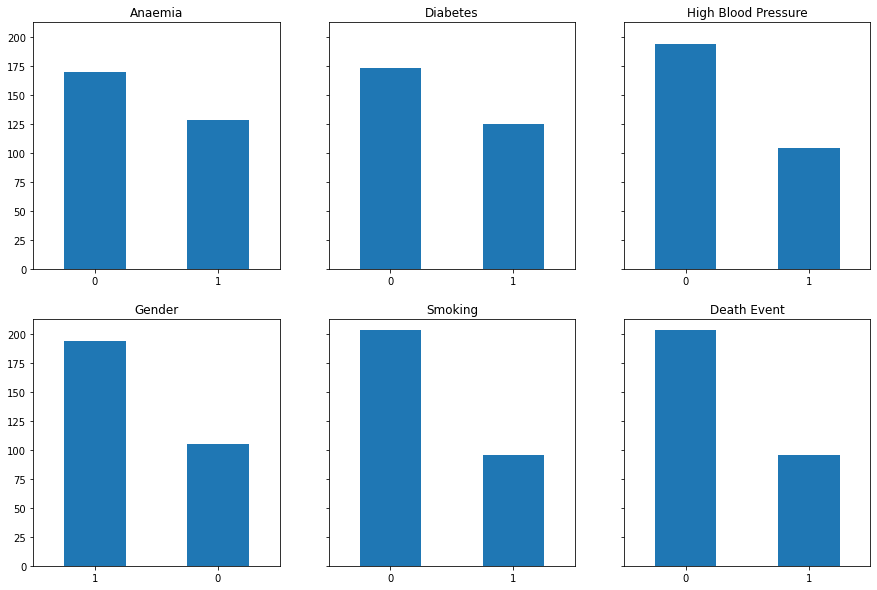

In [6]:
fig, axes = plt.subplots(2, 3, figsize = (15,10), sharey = True)
HF.anaemia.value_counts().plot.bar(title = 'Anaemia', ax=axes[0,0])
HF.diabetes.value_counts().plot.bar(title ='Diabetes', ax=axes[0,1])
HF.high_blood_pressure.value_counts().plot.bar(title = 'High Blood Pressure', ax=axes[0,2])
HF.sex.value_counts().plot.bar(title = 'Gender', ax=axes[1,0])
HF.smoking.value_counts().plot.bar(title = 'Smoking', ax=axes[1,1])
HF.DEATH_EVENT.value_counts().plot.bar(title = 'Death Event', ax=axes[1,2])
for ax in fig.axes:
    ax.tick_params(labelrotation=0)

## Histograms

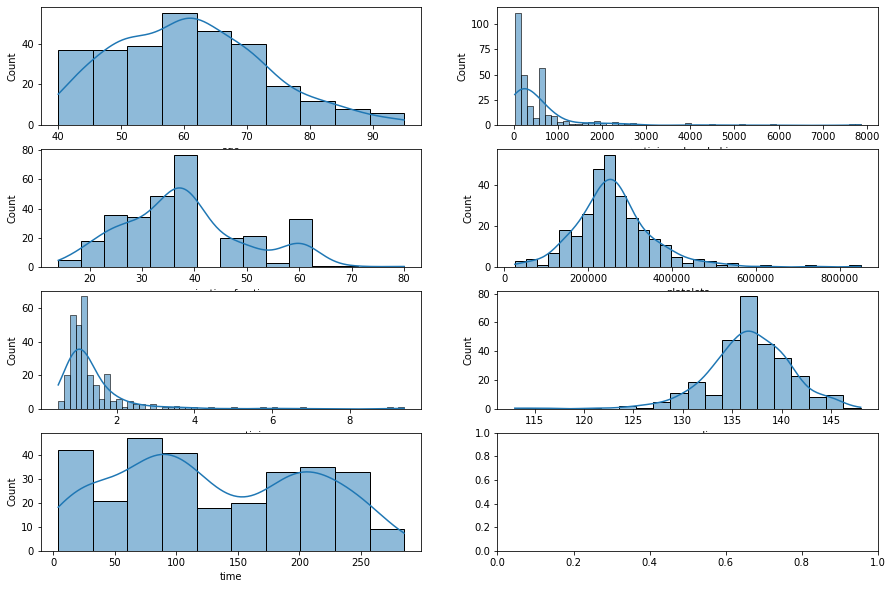

In [7]:
fig, axs = plt.subplots(4, 2, figsize=(15, 10))
sns.histplot(data=HF, x="age", kde=True, ax=axs[0, 0])
sns.histplot(data=HF, x="creatinine_phosphokinase", kde=True, ax=axs[0, 1])
sns.histplot(data=HF, x="ejection_fraction", kde=True, ax=axs[1, 0])
sns.histplot(data=HF, x="platelets", kde=True, ax=axs[1, 1])
sns.histplot(data=HF, x="serum_creatinine", kde=True, ax=axs[2, 0])
sns.histplot(data=HF, x="serum_sodium", kde=True, ax=axs[2, 1])
sns.histplot(data=HF, x="time", kde=True, ax=axs[3, 0])
plt.show()

# Random Forests 

## Additional packages 

In [37]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

## Train Test Split

In [38]:
x = HF.drop('DEATH_EVENT', axis = 1)
y = HF.DEATH_EVENT
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=76)

## Initial Random Forest Model

In [39]:
forest = RandomForestClassifier(n_estimators=500, random_state=76)
forest.fit(x_train, y_train)

RandomForestClassifier(n_estimators=500, random_state=76)

## Evaluate Model Fit

In [40]:
forestPredictions = forest.predict(x_test)
print(confusion_matrix(y_test, forestPredictions))
print(classification_report(y_test, forestPredictions))

[[57  5]
 [ 8 20]]
              precision    recall  f1-score   support

           0       0.88      0.92      0.90        62
           1       0.80      0.71      0.75        28

    accuracy                           0.86        90
   macro avg       0.84      0.82      0.83        90
weighted avg       0.85      0.86      0.85        90



__*The model is has an accuracy of 85%*__

# Hyperparameter Tuning

## Additional Packages

In [41]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score

## Number of Estimators

In [43]:
n_estimators_array = [1, 4, 5, 8, 10, 20, 50, 75, 100, 250, 500]
results = []
for n in n_estimators_array:
    forest = RandomForestClassifier(n_estimators=n, random_state=76)
    forest.fit(x_train, y_train)
    result = accuracy_score(y_test, forest.predict(x_test))
    results.append(result) 
    print(n, ':', result)

1 : 0.8111111111111111
4 : 0.7222222222222222
5 : 0.7555555555555555
8 : 0.7777777777777778
10 : 0.8111111111111111
20 : 0.8333333333333334
50 : 0.8777777777777778
75 : 0.8555555555555555
100 : 0.8555555555555555
250 : 0.8666666666666667
500 : 0.8555555555555555


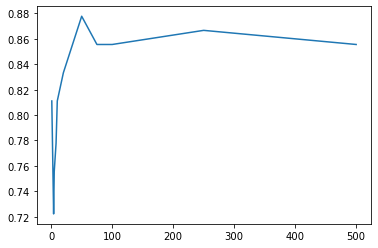

In [44]:
plt.plot(n_estimators_array, results)

In [47]:
max(results)

0.8777777777777778

In [55]:
n_est = n_estimators_array[results.index(max(results))]
n_est

50

__*The optimal number of estimators is 50*__

## Tuning the Remaing Tree Parameters

In [21]:
# Number of features to consider at every split
max_features = ['auto', None, 'log2']
# Maximum number of levels in tree
max_depth = [10, 20, 30, 40, 50, 60, 70, 80, 90, None]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
random_grid = {'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_leaf': min_samples_leaf}
print(random_grid)

{'max_features': ['auto', None, 'log2'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, None], 'min_samples_leaf': [1, 2, 4]}


In [56]:
rf = RandomForestClassifier(n_estimators=n_est)
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 90, cv = 3, random_state=42)
rf_random.fit(x_train, y_train)

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(n_estimators=50),
                   n_iter=90,
                   param_distributions={'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, None],
                                        'max_features': ['auto', None, 'log2'],
                                        'min_samples_leaf': [1, 2, 4]},
                   random_state=42)

In [59]:
params = rf_random.best_params_
params

{'min_samples_leaf': 4, 'max_features': 'auto', 'max_depth': 10}

## Tuned Random Forest

In [60]:
forest = RandomForestClassifier(n_estimators=n_est,min_samples_leaf=params.get('min_samples_leaf'), 
                                max_features=params.get('max_features'), max_depth=params.get('max_depth'))
forest.fit(x_train, y_train)
forest.fit(x_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=4, n_estimators=50)

In [61]:
forestPredictions = forest.predict(x_test)
print(confusion_matrix(y_test, forestPredictions))
print(classification_report(y_test, forestPredictions))

[[60  2]
 [ 7 21]]
              precision    recall  f1-score   support

           0       0.90      0.97      0.93        62
           1       0.91      0.75      0.82        28

    accuracy                           0.90        90
   macro avg       0.90      0.86      0.88        90
weighted avg       0.90      0.90      0.90        90



__*The tunned model has a 90% overall accuracy*__

## Feature Importance

In [65]:
feature_importances = pd.Series(forest.feature_importances_, index=x.columns)
feature_importances
feature_importances.sort_values(inplace=True, ascending=True)
print(feature_importances)

diabetes                    0.006435
smoking                     0.006577
sex                         0.008035
anaemia                     0.008422
high_blood_pressure         0.009373
creatinine_phosphokinase    0.044030
platelets                   0.055875
serum_sodium                0.059017
age                         0.075958
ejection_fraction           0.145159
serum_creatinine            0.171279
time                        0.409840
dtype: float64


<AxesSubplot:>

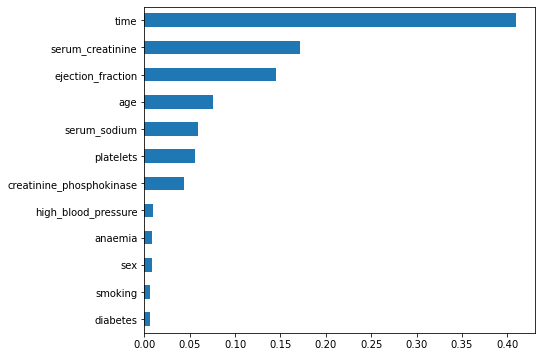

In [66]:
feature_importances.plot(kind='barh', figsize=(7,6))